# Problem Description:
A Human Resource company needs to determine the salary for a new job position being created. They only have access to a salary dataset for the company, which includes salary information for the top 10 positions along with their corresponding levels. The task is to assist HR in deciding the appropriate salary if the new position falls between levels 7 and 8.

Data Set: **Position_Salaries.csv**
Rules: You are restricted from utilizing the sklearn library.You are limited to using only the libraries provided.

Reference : https://www.javatpoint.com/machine-learning-polynomial-regression

 https://www.kaggle.com/code/omkarsantoshraut/polynomial-regression

In [2]:
# Allowded to use only these libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Exploratory data analysis

In [3]:
# your code(s)
data = pd.read_csv("Position_Salaries.csv")
data.head(10)

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [4]:
data.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


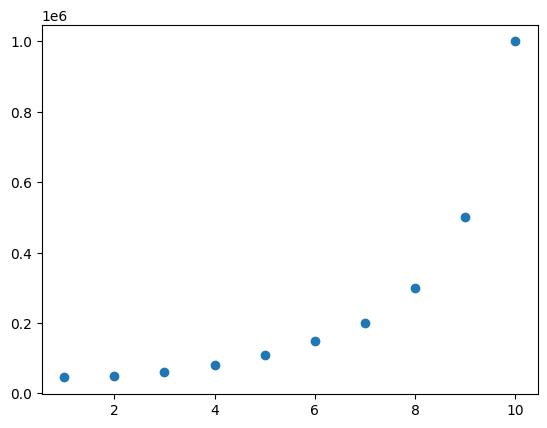

In [5]:
plt.scatter(data.Level,data.Salary)

### Based on the exploratory data analysis, answer the following


* Can you use a simple linear regression model to fit this data (Yes/No)?
> * No
* If you use a simple linear model to fit this data, will it fit well (Yes/No)?
> * No
* Explain why you said yes or no to the above questions.
> * The scatter plot shows that the data points do not follow a linear pattern. Attempting to fit a simple linear model will lead to underfitting.



## Polynomial Regression

**Construct a second order Model:** 
$\hat y = w_1 x_1^2 + w_2x_1 + b$


**Construct a Cost function:** 
$MSE(w_1,w_2,b) = \frac{1}{N} \sum_{i=1}^N (y_i-(w_1x_i^2 + w_2x +b))^2$


### By analysing the cost function, answer the following


* Can you use mean squared error as the cost function (Yes/No)?
> * Yes
* Explain why you said yes or no to the above questions.
> * Mean squared error indicates how close the predicted value is to the actual value of y. 

**Derivatives of cost function:**

$\frac{\partial MSE}{\partial w_1} = \frac{2}{N} \sum_{i=1}^N \left( w_1x_i^2 + w_2x_i + b - y_i \right)*x_i^2 $

$\frac{\partial MSE}{\partial w_2} = \frac{2}{N} \sum_{i=1}^N \left( w_1x_i^2 + w_2x_i + b - y_i \right)*x_i $

$\frac{\partial MSE}{\partial b} = \frac{2}{N} \sum_{i=1}^N \left( w_1x_i^2 + w_2x_i + b - y_i \right)$




**Gradient Descent Algorithm:**
```
Repeat until converges:
```
$w_1 = w_1 -\alpha \frac{\partial MSE}{\partial w_1} $

$w_2 = w_2 -\alpha \frac{\partial MSE}{\partial w_2} $

$b = b -\alpha \frac{\partial MSE}{\partial b} $

## Implementation of the model

In [ ]:
# Write a code/ function to do the following

# function for your model

# a function for your cost function

# function to calculate the derivatives

# code to estimate the parametes using gradient descent
# Aslo estimate the cost function in each iteration

# Plot the model with the data given
# plot the iteratio VS cost

# estimate the solution to the given problem

# mark the point or result in the graph (plot)

# Estimate the model performance

The value of w after  250000  iteration 19418.69623651129 -132708.07788015323 231748.3001864255


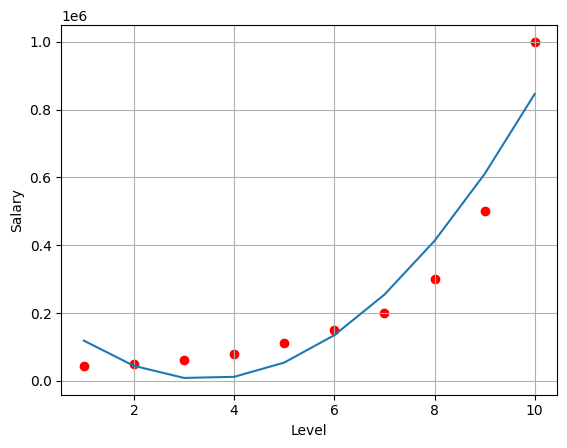

In [9]:
X = data['Level'].values
Y = data['Salary'].values

# Cost function
def cost_function(x,y,w1,w2,b):
  N = x.size
  return 1/N*(np.sum(((w1*x*x + w2*x+b)-y)**2))

# Derivatives of the cost function
def compute_gradient_wb(x,y,w1,w2,b):
  N = x.size
  res = (w1*x*x + w2*x+b-y)
  dMSE_dw1 = (2/N)*(np.sum(res*x*x))
  dMSE_dw2 = (2/N)*(np.sum(res*x))
  dMSE_db = (2/N)*np.sum(res)
  return dMSE_dw1, dMSE_dw2, dMSE_db

# Main code

alpha = 0.0002   # Learning rate
w1, w2, b  = 1,2,24000   # initial guess of the w and b
M = 250000           # Number of iterations
cost = []

# implementation of the gradient descent
for i in range(M):
  dMSE_dw1, dMSE_dw2, dMSE_db = compute_gradient_wb(X,Y,w1,w2,b)
  w1 = w1 - alpha*dMSE_dw1
  w2 = w2 - alpha*dMSE_dw2
  b = b - alpha*dMSE_db
  cost.append(cost_function(X,Y,w1,w2,b))


print('The value of w after ',M,' iteration', w1, w2, b)

y_predict = (w1*X*X + w2*X + b)

# Plot the model with the data given

plt.scatter(X, Y, color = 'red')
plt.plot(X,y_predict)
plt.xlabel('Level')
plt.ylabel('Salary')
plt.grid()



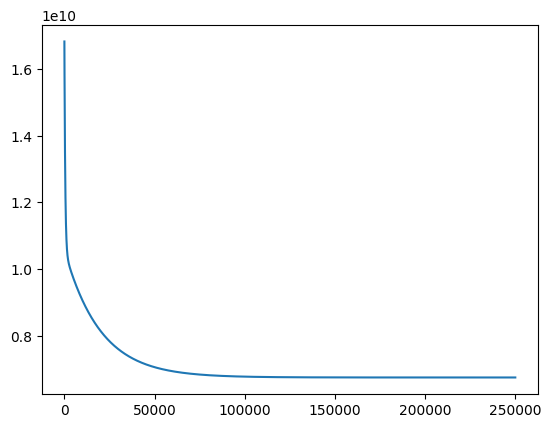

In [8]:
# plot the iteration VS cost

plt.plot(cost)

In [183]:
x = 7.5
predicted_salary = w1*x*x + w2*x + b
print("Predicted salary for new position is %d" %(predicted_salary))

Predicted salary for new position is 328740


In [184]:
ssr = np.sum((Y - y_predict)**2)
sst = np.sum((Y-np.mean(Y))**2)

R2 = 1 - ssr/sst
print(R2)

0.9162080598532102


### Answer the following

* What is learning rate?
> * Learning rate is a hyperparameter which that determines the step size by which a parameter is adjusted during each iteration of the gradient descent algorithm.
* What will happen if the learning rate is too large?
> * If the learning rate is too large, it can lead to overshoot the minimum. 
* What will happen if the learning rate is too small?
> * Small learning rate leads to slow convergence requiring many iterations.
* If you what to change the second order (quadratic) model to third order model what all things will change in the above code?
> * Model: $\hat y = w_1 x^3 + w_2x^2 + w_3x + b

> * Cost function : $MSE(w_1,w_2,b) = \frac{1}{N} \sum_{i=1}^N (y_i-(w_1 x_i^3 + w_2x_i^2 + w_3x_i + b))^2$

> * **Derivatives of cost function:**

$\frac{\partial MSE}{\partial w_1} = \frac{2}{N} \sum_{i=1}^N \left( w_1 x_i^3 + w_2x_i^2 + w_3x_i + b - y_i \right)*x_i^3 $

$\frac{\partial MSE}{\partial w_2} = \frac{2}{N} \sum_{i=1}^N \left( w_1 x_i^3 + w_2x_i^2 + w_3x_i + b - y_i \right)*x_i^2 $

$\frac{\partial MSE}{\partial w_3} = \frac{2}{N} \sum_{i=1}^N \left( w_1 x_i^3 + w_2x_i^2 + w_3x_i + b - y_i \right)*x_i $

$\frac{\partial MSE}{\partial b} = \frac{2}{N} \sum_{i=1}^N \left(w_1 x_i^3 + w_2x_i^2 + w_3x_i + b - y_i \right)$




> * **Gradient Descent Algorithm:**
```
Repeat until converges:
```
$w_1 = w_1 -\alpha \frac{\partial MSE}{\partial w_1} $

$w_2 = w_2 -\alpha \frac{\partial MSE}{\partial w_2} $

$w_3 = w_3 -\alpha \frac{\partial MSE}{\partial w_3} $

$b = b -\alpha \frac{\partial MSE}{\partial b} $
